POINT ESTIMATES

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [6]:
np.random.seed(10)
pop_ages_1=stats.poisson.rvs(loc=18,mu=35,size=150000) 
pop_ages_2=stats.poisson.rvs(loc=18,mu=10,size=100000)
pop_ages=np.concatenate((pop_ages_1,pop_ages_2))
pop_ages.mean()
#pop=population

43.002372

In [7]:
np.random.seed(6)
sample_ages=np.random.choice(a=pop_ages,
                            size=500)
print(sample_ages.mean())    #Show sample mean
pop_ages.mean()-sample_ages.mean()   #Check difference between means

42.388


0.614372000000003

In [9]:
random.seed(10)
pop_races=(["white"*100000])+(["black"]*50000)+\
          (["hispanic"]*50000)+(["asian"]*25000)+\
          (["other"]*25000)
demo_sample=random.sample(pop_races,1000) #Sample 1000 values
for race in set(demo_sample):
    print(race+"proportion estimate:")
    print(demo_sample.count(race)/1000)

asianproportion estimate:
0.192
otherproportion estimate:
0.168
blackproportion estimate:
0.349
hispanicproportion estimate:
0.291


SAMPLING DISTRIBUTIONS AND THE CENTRAL LIMIT THEOREM

-0.12008483603917186


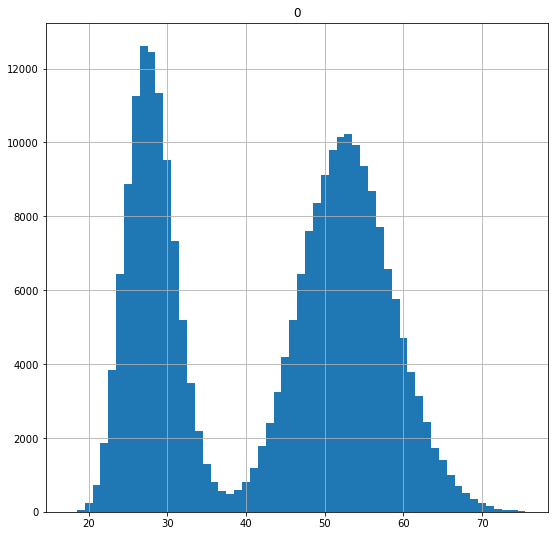

In [10]:
pd.DataFrame(pop_ages).hist(bins=58,
                           range=(17.5,75.5),
                           figsize=(9,9))
print(stats.skew(pop_ages))

-0.12008483603917186


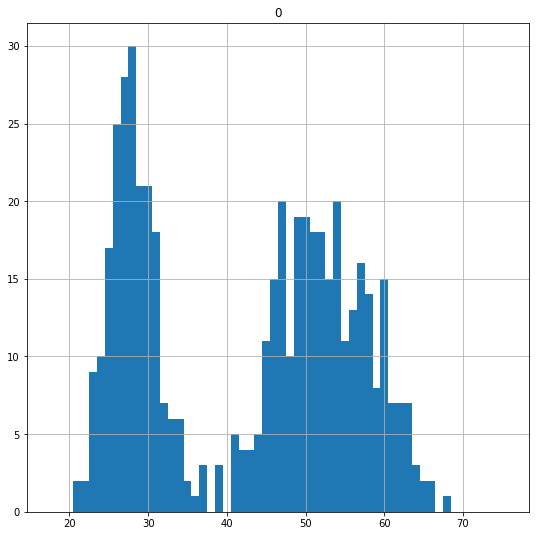

In [11]:
pd.DataFrame(sample_ages).hist(bins=58,
                           range=(17.5,75.5),
                           figsize=(9,9))
print(stats.skew(pop_ages))

<AxesSubplot:ylabel='Density'>

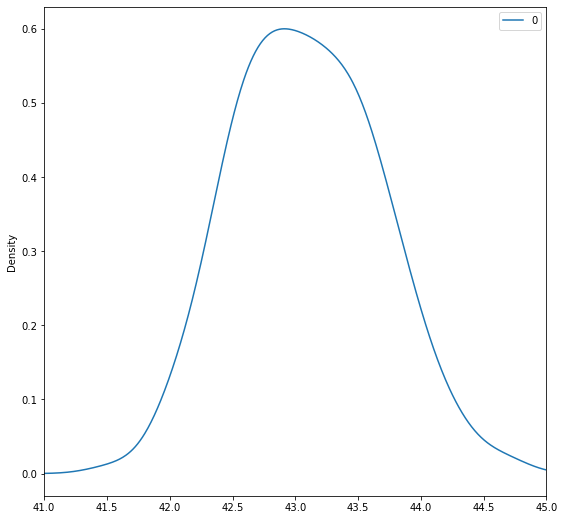

In [13]:
np.random.seed(10)
point_estimates=[]  #Make empty list to hold point estimates
for x in range(200):#Generate 200 samples
    sample=np.random.choice(a=pop_ages,size=500)
    point_estimates.append(sample.mean())
pd.DataFrame(point_estimates).plot(kind="density",
                                   figsize=(9,9),
                                   xlim=(41,45))

In [14]:
pop_ages.mean()-np.array(point_estimates).mean()

-0.08440799999999626

CONFIDENCE INTERVALS

In [18]:
np.random.seed(10)
sample_size=1000
sample=np.random.choice(a=pop_ages,size=sample_size)
sample_mean=sample.mean()
z_critical=stats.norm.ppf(q=0.975) #Get the z-critical values
print("Z-Critical Value:")
print(z_critical)
pop_stdev=pop_ages.std()  #Get the standard deviation
margin_of_error=z_critical*(pop_stdev/math.sqrt(sample_size))
confidence_interval=(sample_mean-margin_of_error,
                    sample_mean+margin_of_error)
print("Confidence Interval")
print(confidence_interval)

Z-Critical Value:
1.959963984540054
Confidence Interval
(41.70306406882683, 43.34293593117317)


In [22]:
np.random.seed(12)
sample_size=1000
intervals=[]
sample_means=[]
for sample in range(25):
    sample=np.random.choice(a=pop_ages,size=sample_size)
    sample_mean=sample.mean()
    sample_means.append(sample_mean)
    z_critical=stats.norm.ppf(q=0.975) #Get the z-critical value
    pop_stdev=pop_ages.std() #Get the population standard deviation
    stats.norm.ppf(q=0.025)
    margin_of_error=z_critical*(pop_stdev/math.sqrt(sample_size))
    confidence_interval=(sample_mean-margin_of_error,
                        sample_mean+margin_of_error)
    intervals.append(confidence_interval)

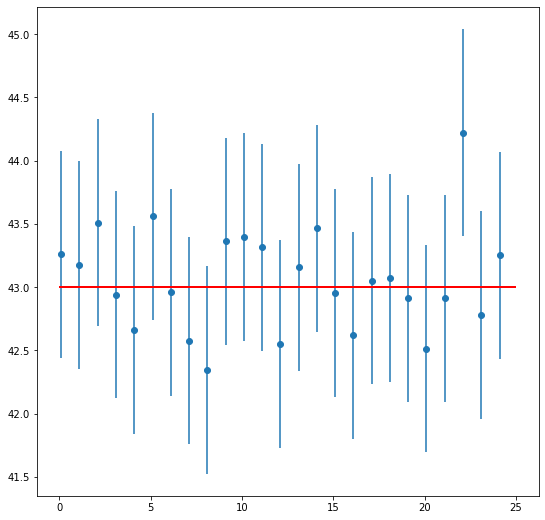

In [23]:
plt.figure(figsize=(9,9))
plt.errorbar(x=np.arange(0.1,25,1),
            y=sample_means,
            yerr=[(top-bot)/2 for top,bot in intervals],
            fmt='o')
plt.hlines(xmin=0,xmax=25,
          y=43.0023,
          linewidth=2.0,
          color="red")

In [25]:
np.random.seed(10)
sample_size=25
sample=np.random.choice(a=pop_ages,size=sample_size)
sample_mean=sample.mean()
t_critical=stats.t.ppf(q=0.975,df=24) #Get the t-critical value
print("T-Critical Value:")            #df=degree of freedom
print(t_critical)
sample_stdev=sample.std(ddof=1) #Get the standard deviation
sigma=sample_stdev/math.sqrt(sample_size) #Standard deviation estimate
margin_of_error=t_critical*sigma
confidence_interval=(sample_mean-margin_of_error,
                    sample_mean+margin_of_error)
print("Confidence Interval:")
print(confidence_interval)

T-Critical Value:
2.0638985616280205
Confidence Interval:
(37.65147508161371, 48.108524918386294)


In [26]:
stats.t.ppf(q=0.975,df=999)-stats.norm.ppf(0.975)
#Check the difference between critical values with a sample size of 1000

0.0023774765933946007

In [27]:
stats.t.interval(alpha=0.95,    #Confidence level
                df=24,          #Degrees of freedom
                loc=sample_mean,#Sample mean
                scale=sigma)    #Standard deviation estimate

(37.65147508161371, 48.108524918386294)

In [28]:
z_critical=stats.norm.ppf(0.975) #Record z-critical value
p=0.192                          #Point estimate of proportion
n=1000                           #Sample size
margin_of_error=z_critical*math.sqrt((p*(1-p))/n)
confidence_interval=(p-margin_of_error,
                    p+margin_of_error)
confidence_interval

(0.16758794241348748, 0.21641205758651252)

In [29]:
stats.norm.interval(alpha=0.95,     #Confidence level
                   loc=0.192,       #Point estimate of proportion
                   scale=math.sqrt((p*(1-p))/n)) #Scaling factor

(0.16758794241348748, 0.21641205758651252)